Image Cartoonifying:

-reduction of noise

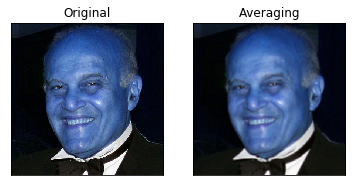

In [302]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('magdi.jpg')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

-gray scale image

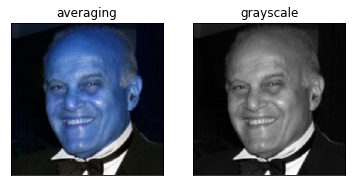

In [303]:

gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)

plt.subplot(121),plt.imshow(dst),plt.title('averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(gray,cmap = plt.cm.gray),plt.title('grayscale')
plt.xticks([]), plt.yticks([])
plt.show()

-edge detector

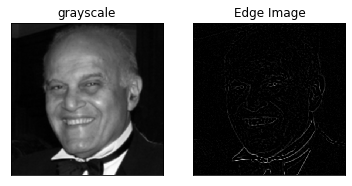

In [304]:
edges = cv2.Laplacian(gray, ddepth=18, ksize=3)

plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('grayscale'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


-bilateral filter of original image

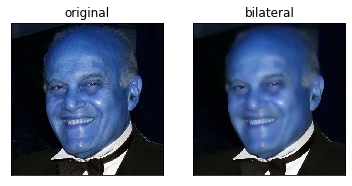

In [305]:
bilateral = cv2.bilateralFilter(img, 15, 75, 75) 


plt.subplot(121),plt.imshow(img)
plt.title('original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(bilateral)
plt.title('bilateral'), plt.xticks([]), plt.yticks([])

plt.show()


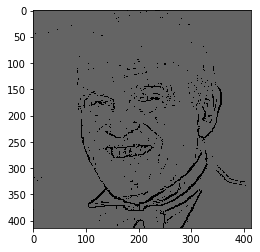

In [306]:

ret,edges=cv2.threshold(edges,15,100,cv2.THRESH_BINARY_INV)

edges = cv2.cvtColor(edges,cv2.COLOR_GRAY2RGB)
edges = edges.astype('uint8')

plt.imshow(edges)
plt.show()



In [307]:
bilateral = bilateral.astype('uint8')


added_image = cv2.addWeighted(bilateral,0.7,edges,0.3,0.0)

output=cv2.imwrite('combined.jpg', added_image) 



In [308]:
bilateral.shape

(414, 414, 3)

In [309]:
edges.shape

(414, 414, 3)

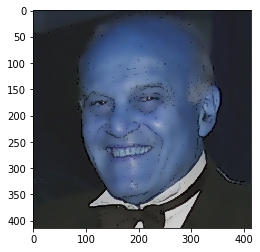

In [310]:
plt.imshow(added_image)
plt.show()
